# 모델 평가
- 모델의 성능을 평가, 평가 결과에 따라 프로세스를 다시 반복

## 분류와 회귀의 평가 방법
### 분류 평가 지표
1. 정확도 (Accuracy)
2. 정밀도 (Precision)
3. 재현률 (Recall)
4. F1점수 (F1 Score)
5. PR Curve, AP Score
6. ROC, AUC Score

### 회귀 평가 방법
1. MSE (Mean Squared Error)
2. RMSE (Root Mean Squared Error)
3. $R^2$ (결정계수)

### sckit-learn 평가 함수 모듈
- sklearn.metrics 모듈을 통해 제공

## 분류(Classification) 평가 지표
### 이진 분류(Binary classification)의 양성(Positive)과 음성(Negative)
- 양성 : 모델이 찾으려는 (추론하려는) 주 대상
- 음성 : 모델이 찾으려는 (추론하려는) 주 대상이 아닌 것

### 정확도(Accuracy)
- 대표적인 분류의 평가 지표
$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$
- 전체 예측 한 것중 맞게 예측한 비율로 평가
- `accuracy_score(정답, 모델 예측값)`

### Accuracy 평가 지표의 문제
- 이진 분류에서 양성에 대한 지표만 확인 할 수 없다.
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.

## MNIST Data set 활용

### 데이터 셋 로드 및 활용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

In [3]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [4]:
# y 값의 구성 분포
np.unique(y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [5]:
print(y[0])
X[0].reshape(8, 8)

0


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

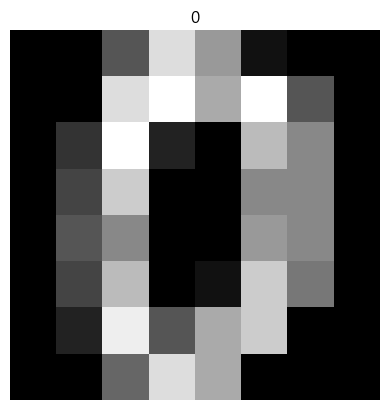

In [6]:
img_index = 0
img = X[img_index].reshape(8, 8)
plt.imshow(img, cmap = 'gray')
plt.title(y[img_index])
plt.axis('off')
plt.show()

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경
- Positive(양성 : 1) : 9
- Negative(음성 : 0) : 0 ~ 8

In [7]:
y = np.where(y == 9, 1, 0) # (조건, True 변환값, False변환값)

In [8]:
print(np.unique(y, return_counts = True))
np.unique(y, return_counts = True)[1]/y.size

(array([0, 1]), array([1617,  180], dtype=int64))


array([0.89983306, 0.10016694])

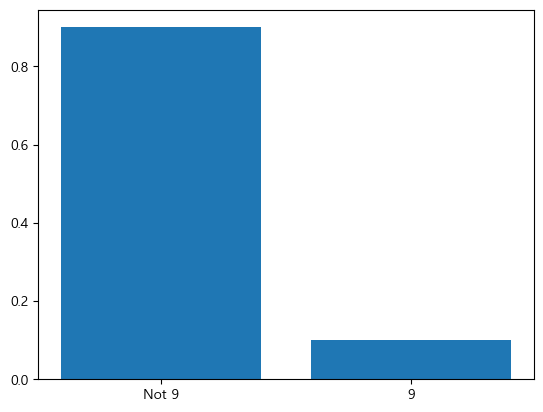

In [9]:
r = np.unique(y, return_counts = True)[1]/y.size
plt.bar([0, 1], r)
plt.xticks([0, 1], ['Not 9', '9'])
plt.show()

### 데이터셋 분할
- train/test로 분할

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

### 모델 생성 및 학습
#### Dummy Model 정의
- dummy model : 진짜 모델이 아닌 모델을 흉내냄
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [12]:
dummy_model = DummyClassifier(strategy = 'most_frequent') # y의 최빈값
dummy_model.fit(X_train, y_train)

# 정확도 검증
pred_train = dummy_model.predict(X_train)
pred_test = dummy_model.predict(X_test)

print('train 정확도:', accuracy_score(y_train, pred_train))
print('test 정확도:', accuracy_score(y_test, pred_test))


train 정확도: 0.8997772828507795
test 정확도: 0.9


In [15]:
np.unique(pred_train), np.unique(pred_test)

(array([0]), array([0]))

아무 학습을 하지 않고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도가 나옴
=> 정확도가 90% 이지만 10%의 9는 아예 분류하지 못함
따라서 불균형 레이블 데이터 세트의 평가지표로 정확도만 보면 안됨 특히 Positive에 대한 예측이 중요한 경우 accuracy는 알맞은 평가 지표가 아님

## 혼동 행렬(Confusion Matrix)
- 실제 값과 예측한 값을 표로 만든 지표
- 함수 : confusion_matrix(정답, 모델 예측값)
![image](https://velog.velcdn.com/images/jjw9599/post/271fc800-bffb-4e8f-83cf-d55d18ede61a/image.png)

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가 지표
- **Accuracy (정확도)**
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진 분류 뿐만 아니라 모든 분류의 기본 평가 방식

### 양성(Positive) 예측력 측정 평가 지표
- **Recall / Sensitivity(재현율 / 민감도)**
    - 실제 양성인것 중에 양성으로 예측한 것의 비율
    - **TPR**(True Positive Rate)라 한다
- **Precision(정밀도)**
    - 양성으로 예측한 것 중 실제 양성인 비율
    - **PPV**(Positive Predictive Value)라 한다
- **F1 점수**
    - 정밀도와 재현율의 조화 평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가짐. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있지 않고 둘다 좋다고 판단할 수 있는 근거가 됨

### 음성(Negative) 예측력 측정 평가 지표
- **Specificity(특이도)**
    - 실제 음성인 것들 중 음성으로 맞게 예측한 것의 비율
    - **TNR**(True Negative Rate)라 한다
- **Fall out(위양성률)**
    - 실제 음성인 것들 중 양성으로 잘못 예측한 것의 비율
    - `1 - 특이도`
    - **FPR**(False Positive Rate)라 함
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$


## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값)**
- **ConfusionMatrixDisplay(Confusion matrix 시각화 클래스)**
    - PlotConfusionMatrix
        - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
    - Recall 점수 반환
- **precision_score(y 실제값, y 예측값)**
    - Precision 점수 반환
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여줌

### Dummy 모델 혼동 행렬

In [16]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, ConfusionMatrixDisplay

In [17]:
# 정확도
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.8997772828507795
0.9


In [18]:
print('confusion matrix')
print('train')
print(confusion_matrix(y_train, pred_train))
print('test')
print(confusion_matrix(y_test, pred_test))

confusion matrix
train
[[1212    0]
 [ 135    0]]
test
[[405   0]
 [ 45   0]]


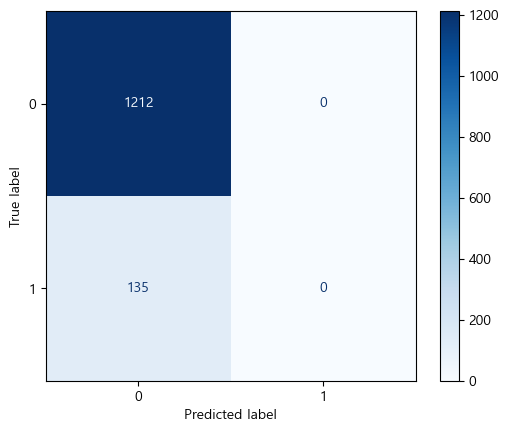

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, pred_train))

disp.plot(cmap = 'Blues')
plt.show()

### Dummy 모델 Accuracy, Recall, Precision, F1-Score

In [20]:
recall_score(y_train, pred_train), recall_score(y_test, pred_test)

(0.0, 0.0)

In [21]:
precision_score(y_train, pred_train), precision_score(y_test, pred_test)

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [22]:
f1_score(y_train, pred_train), f1_score(y_test, pred_test)

(0.0, 0.0)

### classification_report()
- Accuracy와 각 class Positive일 때의 recall, precision, f1-score를 한번에 보여줌

In [23]:
from sklearn.metrics import classification_report

report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1212
           1       0.00      0.00      0.00       135

    accuracy                           0.90      1347
   macro avg       0.45      0.50      0.47      1347
weighted avg       0.81      0.90      0.85      1347



c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 머신러닝 모델을 이용해 학습
- DecisionTreeClassifier 사용 (max_depth = 3)
- RandomForestClassifier 사용 (n_estimators = 100, max_depth = 3)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
%%writefile metrics.py
# 평가 지표 저장 모듈
__version__ = 1.0

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, ConfusionMatrixDisplay

def plot_confusion_matrix(y, pred, title=None):
    """
    Confusion Matrix 시각화 함수
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 예측값
        title: str - 그래프 제목
    [return]
    [exception]
    """
    
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    if title:
        plt.title(title)
    plt.show()
    
def print_metrics_classification(y, pred, title = None):
    """
    classification(분류) 결과들을 출력하는 함수
    accuracy, recall, precision, f1_score
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 예측값
        title: str - 그래프 제목
    [return]
    [exception]
    """
    if title:
        print(title)
    print('정확도(accuracy):', accuracy_score(y, pred))
    print('재현율/민감도(recall):', recall_score(y, pred))
    print('정밀도(precision):', precision_score(y, pred))
    print('F1-score:', f1_score(y, pred))

Writing metrics.py


In [26]:
from metrics import print_metrics_classification, plot_confusion_matrix

In [27]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state = 0)

# 학습
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rfc = rfc.predict(X_train)
pred_test_rfc = rfc.predict(X_test)

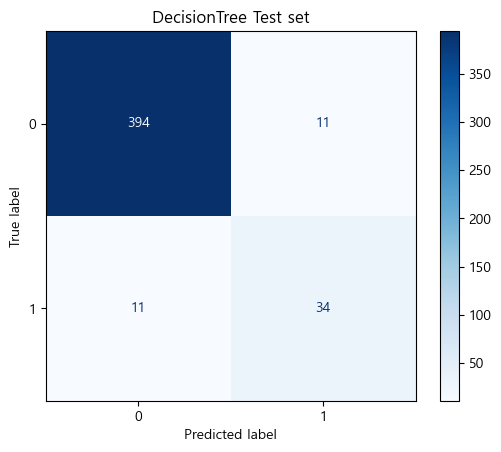

In [28]:
## confusion matrix
plot_confusion_matrix(y_test, pred_test_tree, 'DecisionTree Test set')

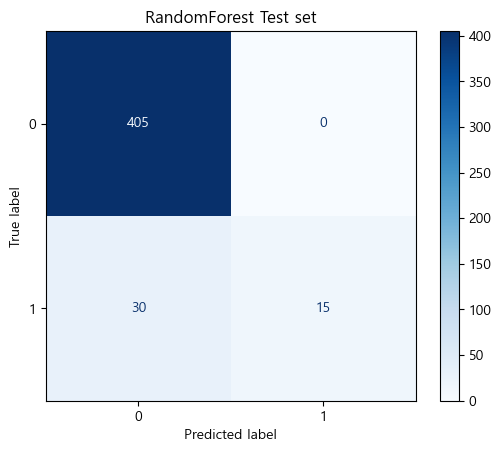

In [29]:
plot_confusion_matrix(y_test, pred_test_rfc, 'RandomForest Test set')

In [31]:
print('######## Decision Tree 검증 결과 ########')
print_metrics_classification(y_train, pred_train_tree, title = 'Train set')
print('='*40)
print_metrics_classification(y_test, pred_test_tree, title = 'Test set')

######## Decision Tree 검증 결과 ########
Train set
정확도(accuracy): 0.9465478841870824
재현율/민감도(recall): 0.8
정밀도(precision): 0.7058823529411765
F1-score: 0.7500000000000001
Test set
정확도(accuracy): 0.9511111111111111
재현율/민감도(recall): 0.7555555555555555
정밀도(precision): 0.7555555555555555
F1-score: 0.7555555555555555


In [32]:
print('######## Random Forest 검증 결과 ########')
print_metrics_classification(y_train, pred_train_rfc, title = 'Train set')
print('='*40)
print_metrics_classification(y_test, pred_test_rfc, title = 'Test set')

######## Random Forest 검증 결과 ########
Train set
정확도(accuracy): 0.9354120267260579
재현율/민감도(recall): 0.35555555555555557
정밀도(precision): 1.0
F1-score: 0.5245901639344263
Test set
정확도(accuracy): 0.9333333333333333
재현율/민감도(recall): 0.3333333333333333
정밀도(precision): 1.0
F1-score: 0.5


## Recall과 Precision의 관계
### Recall이 더 중요한 경우 (정답이 1인 것을 찾는 비율)
- 실제 Positive 데이터를 Negative로 잘못 판단하면 업무상 큰 영향이 있는 경우
- FN(False Negative)를 낮추는데 초점을 맞춤
- 암환자 판정 모델, 보험사기 적발 모델

### Precision이 더 중요한 경우 (Positive 예측이 얼마나 맞았는지에 대한 비율)
- 실제 Negative 데이터를 Positive로 잘못 판단하면 업무상 큰 영향이 있는 경우
- FP(False Positive)를 낮추는데 초점을 맞춘다
- 스팸메일 판정
![image](https://velog.velcdn.com/images/ppippi/post/97e2bfc0-2438-430b-a4ed-78685d68a81c/image.png)
- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측